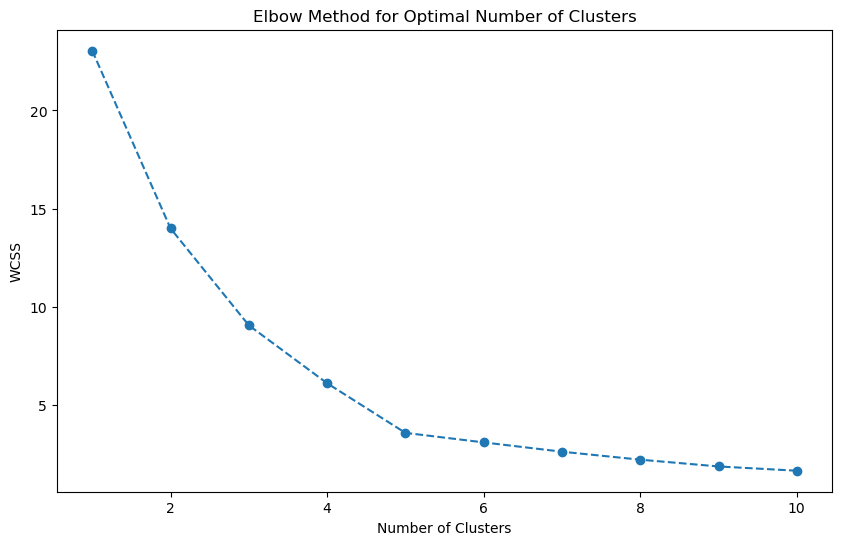

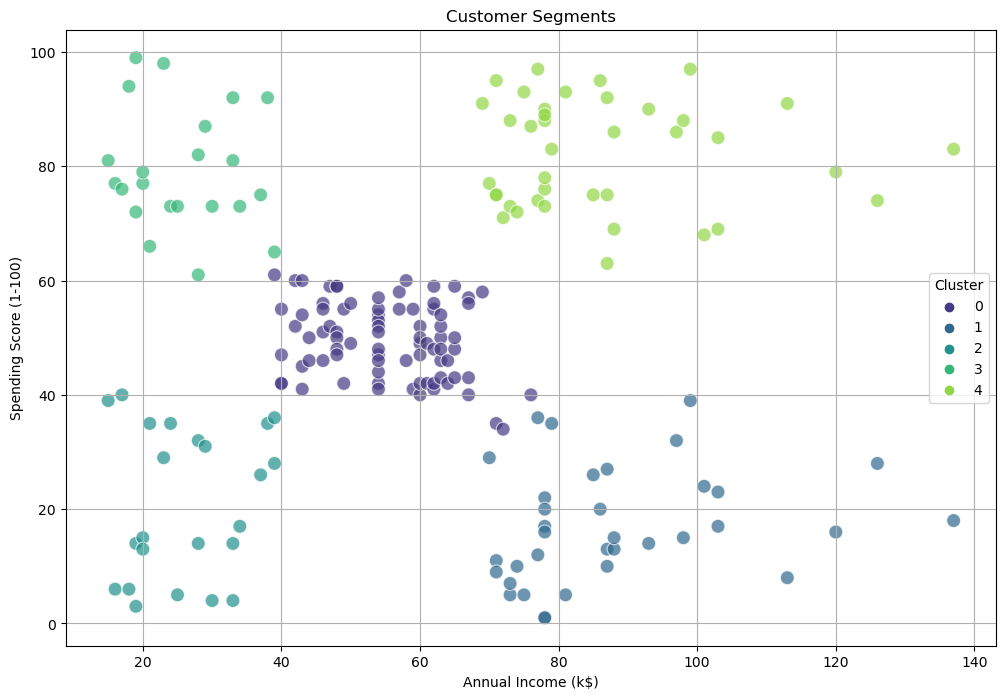

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv(r"C:\Users\91939\Downloads\Mall_Customers.csv")
# if unable to load dataset download dataset from kaggle and accordingly set path
# dataset link : https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

# Extract relevant features for clustering
customer_features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Normalize the feature data
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(customer_features)

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(normalized_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Set the number of clusters based on the Elbow method
optimal_clusters = 5

# Initialize and fit the K-means algorithm
kmeans_model = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans_model.fit_predict(normalized_features)

# Improved visualization
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette=sns.color_palette('viridis', n_colors=optimal_clusters), data=data, s=100, alpha=0.7, edgecolor='w')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
